In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import MultiPolygon
import rasterio
from rasterio.features import rasterize
from shapely.ops import transform
from functools import partial
import pyproj
import xarray as xr

In [3]:
#read in the ipbes region shapefile
shp_dir = "/storage/workspaces/wa_climate/climate_trt/chari/IPBES_subregions/IPBES_Regions_Subregions2.shp"
shp = gpd.read_file(shp_dir) 

#define the new regions
region_mapping = {
    'Carribean': 'Caribbean & Mesoamerica',
    'Central Africa': 'West, Central, East & South Africa',
    'Central and Western Europe': 'Central and Western Europe',
    'Central Asia': 'Central, North-East & South Asia',
    'East Africa and adjacent islands': 'West, Central, East & South Africa',
    'Eastern Europe': 'Eastern Europe',
    'Mesoamerica': 'Caribbean & Mesoamerica',
    'North Africa': 'North Africa & Western Asia',
    'North America': 'North America',
    'Nort-East Asia': 'Central, North-East & South Asia',
    'Oceania': 'Oceania',
    'South America': 'South America',
    'South Asia': 'Central, North-East & South Asia',
    'South-East Asia': 'South-East Asia',
    'Southern Africa': 'West, Central, East & South Africa',
    'West Africa': 'West, Central, East & South Africa',
    'Western Asia': 'North Africa & Western Asia'
}

#create the new regions in the shp
shp['new_region'] = shp['Sub_Region'].map(region_mapping)

In [5]:
# Rasterize each region and save as NetCDF
for region, new_region in region_mapping.items():
    # Select the region's geometry
    region_geometry = shp.loc[shp['new_region'] == new_region, 'geometry'].squeeze()

    # Rasterize
    x_res, y_res = 0.5, 0.5
    shape = (int(180/y_res), int(360/x_res))
    transform = rasterio.transform.from_origin(-180, 90, x_res, y_res)
    out_array = rasterio.features.rasterize(
        [(geom, 1) for geom in region_geometry],
        out_shape=shape,
        transform=transform,
        fill=0,
        all_touched=True,
        dtype=np.uint8
    )

    # Convert the raster data to xarray DataArray
    lon = np.linspace(-180, 180, shape[1], endpoint=False)
    lat = np.linspace(90, -90, shape[0], endpoint=False)

    da = xr.DataArray(
        out_array,
        coords=[lat, lon],
        dims=["latitude", "longitude"],
        name=f"{new_region}_data"
    )

    # Save it as a NetCDF file
    output_nc_path = f'/storage/workspaces/wa_climate/climate_trt/chari/IPBES_subregions/output_{new_region}_data.nc'
    da.to_netcdf(output_nc_path, format='NETCDF4', mode="w")
    print(f"NetCDF file saved for region: {new_region}")

NetCDF file saved for region: Caribbean & Mesoamerica
NetCDF file saved for region: West, Central, East & South Africa
NetCDF file saved for region: Central and Western Europe
NetCDF file saved for region: Central, North-East & South Asia
NetCDF file saved for region: West, Central, East & South Africa
NetCDF file saved for region: Eastern Europe
NetCDF file saved for region: Caribbean & Mesoamerica
NetCDF file saved for region: North Africa & Western Asia
NetCDF file saved for region: North America
NetCDF file saved for region: Central, North-East & South Asia
NetCDF file saved for region: Oceania
NetCDF file saved for region: South America
NetCDF file saved for region: Central, North-East & South Asia
NetCDF file saved for region: South-East Asia
NetCDF file saved for region: West, Central, East & South Africa
NetCDF file saved for region: West, Central, East & South Africa
NetCDF file saved for region: North Africa & Western Asia


/scratch/local/1413030/ipykernel_43341/1262496222.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


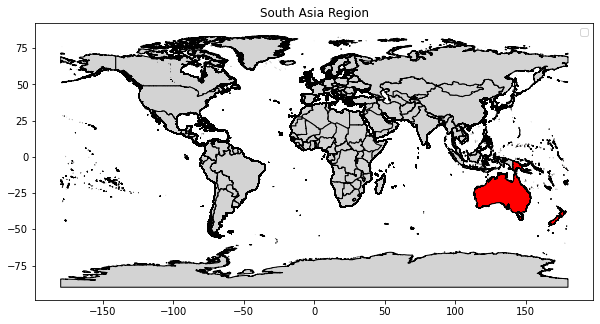

In [9]:
#plot e.g. sub-saharan africa
import matplotlib.pyplot as plt

# Filter the GeoDataFrame to get only the rows where the new_region is 'South Asia'
south_asia_gdf = shp[shp['new_region'] == 'Oceania']

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
shp.plot(ax=ax, color='lightgray', edgecolor='black')
south_asia_gdf.plot(ax=ax, color='red', edgecolor='black', label='South Asia')

# Add legend
ax.legend()

# Set plot title
plt.title('South Asia Region')

# Show the plot
plt.show()


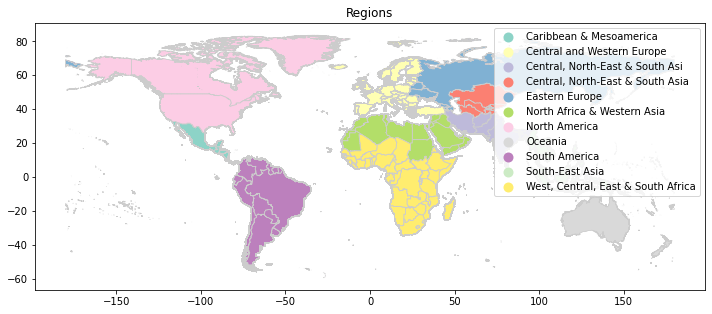

In [15]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame with a colormap based on the 'new_region' column
fig, ax = plt.subplots(figsize=(12, 12))
shp.plot(column='new_region', cmap='Set3', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
plt.title('Regions')

# Show the plot
plt.show()


In [12]:
new_regions_list = shp['new_region'].unique().tolist()

# Print or use the list as needed
print(new_regions_list)

[nan, 'Central, North-East & South Asi', 'West, Central, East & South Africa', 'Central and Western Europe', 'North Africa & Western Asia', 'South America', 'Eastern Europe', 'Oceania', 'Caribbean & Mesoamerica', 'South-East Asia', 'North America', 'Central, North-East & South Asia']
